In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###### Read the data

In [136]:
import os
os.chdir("C:\\Users\\Rebecca\\Documents\\TL Study Docs\\ML\\Dataset")

In [143]:
dataset=pd.read_csv("Salary_Data.csv")

###### Data Exploration

In [144]:
dataset.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [145]:
dataset.isna().any()

YearsExperience    False
Salary              True
dtype: bool

In [146]:
dataset.isnull().any()

YearsExperience    False
Salary              True
dtype: bool

In [147]:
dataset.shape

(30, 2)

In [148]:
#dataset.dropna(inplace=True)

In [149]:
dataset.shape

(30, 2)

In [150]:
dataset.fillna(dataset.Salary.mean(),inplace=True)

In [151]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.967213
Salary,0.967213,1.000000


###### Data Visualization

In [152]:
import seaborn as sns

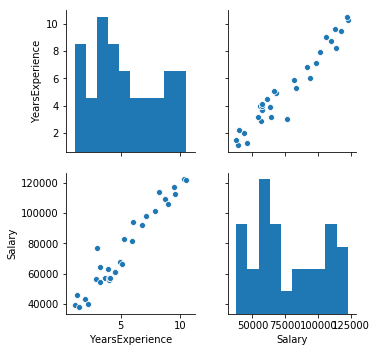

In [153]:
sns.pairplot(dataset)

In [154]:
X=dataset[['YearsExperience']]

In [155]:
X.head(1)

,YearsExperience
0,1.1


In [156]:
Y=dataset['Salary']

In [157]:
Y.head(1)

0    39343.0
Name: Salary, dtype: float64

###### Fitting the Model

In [163]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.1,random_state=101)

In [164]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [165]:
Ytrain.head(1)

18    81363.0
Name: Salary, dtype: float64

In [166]:
trainedFit=linreg.fit(Xtrain,Ytrain)

In [167]:
print(trainedFit.intercept_)
print(trainedFit.coef_)


27484.128453414043
[9231.01767541]


C:\Users\Rebecca\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Rebecca\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


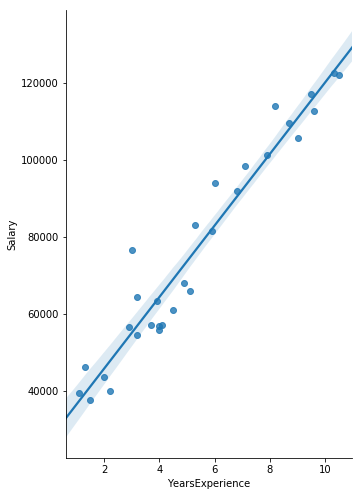

In [168]:
sns.pairplot(dataset, x_vars=['YearsExperience'], y_vars='Salary', size=7, aspect=0.7, kind='reg')

In [192]:
salaryPredicted=trainedFit.predict(Xtest)

In [193]:
trainedFit.predict([[5.9]])

array([81947.13273834])

In [194]:
list(zip(Ytest,salaryPredicted))

[(91738.0, 90255.04864620435),
 (109431.0, 107793.98222948398),
 (54445.0, 57023.38501472713)]

###### Validating the predictions

In [195]:
trainedFit.score(Xtrain,Ytrain)

0.9300727622350771

In [173]:
import statsmodels.formula.api as sm

In [174]:
result=sm.OLS(Y,X).fit()

In [175]:
print(result.params)

YearsExperience    13300.471972
dtype: float64


######  Manual Calculation
Calculating the value manually.
y=mx+c  m=13300  so for every 1 year of exp, there will be 13300 increase in salary
5.9*13300=78490    c=4545.15

In [176]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     895.9
Date:                Mon, 06 May 2019   Prob (F-statistic):           2.34e-23
Time:                        23:15:34   Log-Likelihood:                -329.74
No. Observations:                  30   AIC:                             661.5
Df Residuals:                      29   BIC:                             662.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   1.33e+04    444.363     29.932      0.000    1.24e+04    1.42e+04
==============================================================================
Omnibus:                        0.225   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.894   Jarque-Bera (JB):                0.296
Skew:                           0.182   Prob(JB):                        0.863
Kurtosis:                       2.677   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
result.rsquared

0.9686451133221952

In [190]:
trainedFit.score(X,Y)

0.9354650055068344

In [187]:
result.pvalues

YearsExperience    2.343630e-23
dtype: float64

In [184]:
result.predict(5.9)

array([78472.78463355])

In [177]:
print(result.conf_int())
result.conf_int

                            0             1
YearsExperience  12391.646682  14209.297262


<bound method RegressionResults.conf_int of <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F848E5E898>>

In [197]:
from sklearn import metrics
metrics.mean_squared_error(Ytest,salaryPredicted)

3842347.060959669

In [213]:
print('Variance score: %.2f' % trainedFit.score(Xtest, Ytest))

Variance score: 0.99


In [180]:
Ytest.mean

<bound method Series.mean of 20     91738.0
24    109431.0
7      54445.0
Name: Salary, dtype: float64>

In [181]:
Ytest.median

<bound method Series.median of 20     91738.0
24    109431.0
7      54445.0
Name: Salary, dtype: float64>

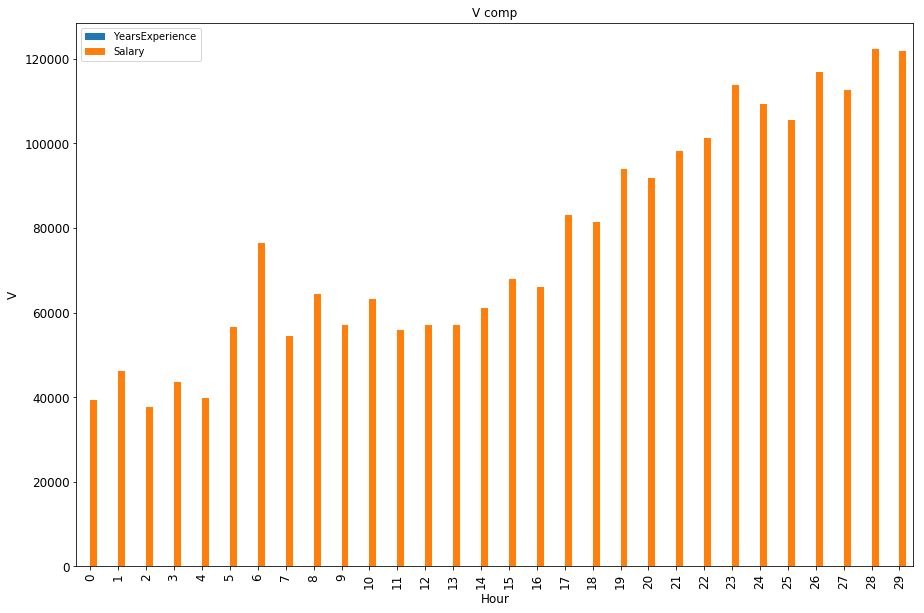

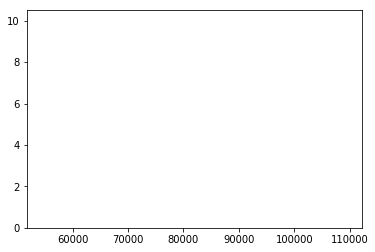

In [232]:
ax = dataset.plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("V", fontsize=12)
plt.show()

plt.bar(Ytest,10,data=salaryPredicted)
plt.show()